In [1]:
# Basic imports
import os
import sys
sys.path.append("..")
from src.config import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Preset Variables if needed:
RANDOM_STATE = 42

In [2]:
df = pd.read_csv(DATASET_PATH, dtype={"clip_id": str})
df["dataset_id"] = df["speaker_id"] + "_" + df["video_id"] + "_" + df["clip_id"]
df = df.set_index("dataset_id")
df = df.dropna()
df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,...,distance_16_08,distance_33_08,distance_00_27,distance_16_27,distance_04_08,distance_12_08,distance_60_64,distance_51_62,distance_57_66,distance_31_35
dataset_id,,,,,,,,,,,,,,,,,,,,,
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,33.945885,0.199680,28.514013,...,1.471136,0.777449,1.146043,1.126334,0.874213,0.865317,0.494993,0.066802,0.064824,0.268284
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,35.520040,0.186342,30.745964,...,1.494071,0.793853,1.152285,1.131379,0.868375,0.867039,0.477836,0.069779,0.068104,0.262190
id00012__raOc3-IRsw_00112,id00012,n000012,m,train,_raOc3-IRsw,00112,1,37.510630,0.200410,30.035390,...,1.479254,0.767715,1.150438,1.129916,0.870555,0.867771,0.492696,0.068896,0.070959,0.270061
id00012__raOc3-IRsw_00111,id00012,n000012,m,train,_raOc3-IRsw,00111,1,37.014935,0.244918,28.439920,...,1.470482,0.818316,1.120526,1.102237,0.852877,0.852429,0.452697,0.073236,0.073450,0.254945
id00012__raOc3-IRsw_00113,id00012,n000012,m,train,_raOc3-IRsw,00113,1,37.225666,0.215866,30.978403,...,1.472087,0.776903,1.148466,1.126694,0.872199,0.865459,0.500130,0.072282,0.072217,0.270821


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, id00012__raOc3-IRsw_00110 to id00080_xKOKZLEReGo_00259
Columns: 111 entries, speaker_id to distance_31_35
dtypes: float64(104), int64(1), object(6)
memory usage: 8.5+ MB


In [4]:
df["gender_m"] = (df["gender"] == "m") * 1
df["gender_m"].sum() / len(df)

np.float64(0.8033803380338034)

In [5]:
df_old = df
gender_mask = df["gender_m"] == 1
males = df[gender_mask]
females = df[~gender_mask]
males_reduced = males.sample(len(females))
balanced_df = pd.concat([males_reduced, females], axis=0)
df = balanced_df
balanced_df["gender_m"].sum() / len(balanced_df)

np.float64(0.5)

In [6]:
info_columns = [
    "speaker_id",
    "face_id",
    "gender",
    "split",
    "video_id",
    "clip_id",
    "batch"
]

test_speaker_ids = random.choices(df["speaker_id"], k=10)
test_mask = df["speaker_id"].isin(test_speaker_ids)
test_df = df[test_mask]
train_df = df[~test_mask]
test_df, train_df = test_df.drop(columns=info_columns), train_df.drop(columns=info_columns)
len(test_df), len(train_df)

/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/random.py:467: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [population[floor(random() * n)] for i in _repeat(None, k)]


(1114, 2818)

In [7]:
AM_COLUMN_NAMES = AM_COLUMN_NAMES + ["gender_m"]

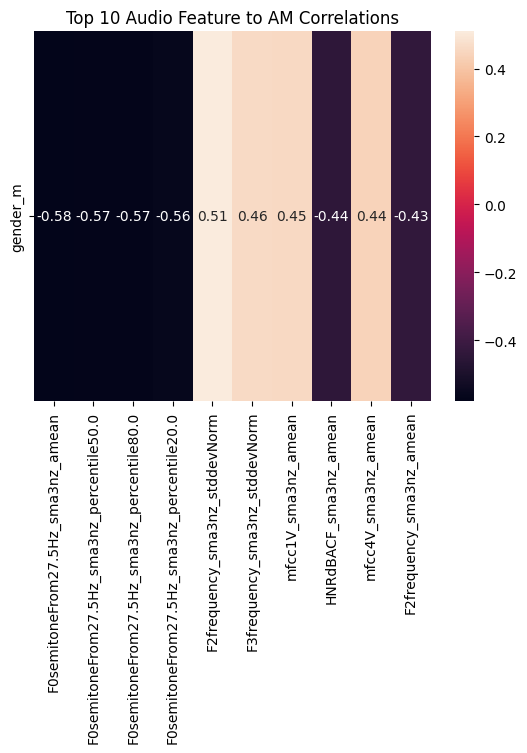

In [8]:
corr = df.drop(columns=info_columns).corr()
corr = corr[["gender_m"]].T.drop(columns=AM_COLUMN_NAMES)
top_10_corr = list(corr.abs().sum().nlargest(10).index)
corr = corr[top_10_corr]
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title("Top 10 Audio Feature to AM Correlations")
plt.show()

In [9]:
y_column_names = AM_COLUMN_NAMES
y_test, y_train = test_df[y_column_names], train_df[y_column_names]
X_test, X_train = test_df.drop(columns=y_column_names), train_df.drop(columns=y_column_names)

In [10]:
AM_COLUMN_NAME = "gender_m"
y_test, y_train = y_test[AM_COLUMN_NAME], y_train[AM_COLUMN_NAME]

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
"""
param_grid = {
    "n_estimators": [100, 500, 1000, 2000],
    "max_depth": [3, 5, 7, 9]
}

param_grid = {
    "n_estimators": [500, 1000, 2000],
    "max_depth": [5, 7],
    "learning_rate": [0.01, 0.1]
}
"""
param_grid = {
    "learning_rate": [0.01], "max_depth": [5], "n_estimators": [500]
}

models = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid,
    n_jobs=10,
    scoring="r2",
)
models.fit(X_train, y_train)
model = models.best_estimator_
models.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, accuracy_score,
                            precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix)

class AVG_MODEL:
    def __init__(self, classifier: bool = True):
        self.mean_value = None
    
    def fit(self, X, y):
        self.mean_value = np.mean(y)
        return self
    
    def predict(self, X):
        if self.mean_value is None:
            raise ValueError("Model must be fitted before prediction")
        return np.full(X.shape[0], round(self.mean_value))

def evaluate_model(m_name: str, m):
    """Evaluate model performance on test data"""
    pred = m.predict(X_test)
    print(f"Evaluation for Model {m_name}:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.4f}")
    print(f"Mean Squared Error : {mean_squared_error(y_test, pred):.4f}")
    print(f"R2 Score           : {r2_score(y_test, pred):.4f}")

def evaluate_model_classification(m_name: str, m):
    pred = m.predict(X_test)
    pred_proba = m.predict_proba(X_test)[:, 1] if hasattr(m, "predict_proba") else None
    
    print(f"Evaluation for Model {m_name}:")
    print(f"Accuracy           : {accuracy_score(y_test, pred):.4f}")
    print(f"Precision          : {precision_score(y_test, pred):.4f}")
    print(f"Recall             : {recall_score(y_test, pred):.4f}")
    print(f"F1 Score           : {f1_score(y_test, pred):.4f}")
    
    if pred_proba is not None:
        print(f"ROC AUC Score      : {roc_auc_score(y_test, pred_proba):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(cm)

In [23]:
avg_model = AVG_MODEL().fit(X_train, y_train)
evaluate_model_classification("AVG_Model", avg_model)

Evaluation for Model AVG_Model:
Accuracy           : 0.1643
Precision          : 0.1643
Recall             : 1.0000
F1 Score           : 0.2822

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       931
           1       0.16      1.00      0.28       183

    accuracy                           0.16      1114
   macro avg       0.08      0.50      0.14      1114
weighted avg       0.03      0.16      0.05      1114

Confusion Matrix:
[[  0 931]
 [  0 183]]


/home/chr1s/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chr1s/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chr1s/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
evaluate_model_classification("GradientBoostingRegressor", model)

Evaluation for Model GradientBoostingRegressor:
Accuracy           : 0.9138
Precision          : 0.6693
Recall             : 0.9399
F1 Score           : 0.7818
ROC AUC Score      : 0.9739

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       931
           1       0.67      0.94      0.78       183

    accuracy                           0.91      1114
   macro avg       0.83      0.92      0.86      1114
weighted avg       0.93      0.91      0.92      1114

Confusion Matrix:
[[846  85]
 [ 11 172]]


In [25]:
import shap

/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


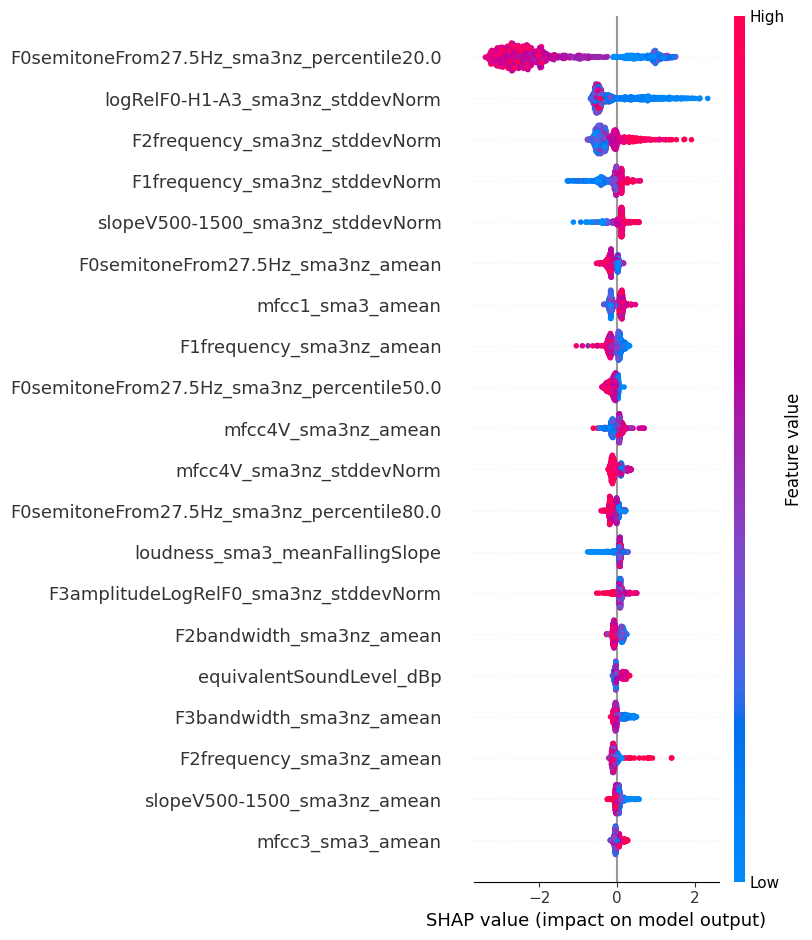

In [26]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)